In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

pca = PCA(n_components=scaled_X_train.shape[1])
pca_transformed = pca.fit_transform(scaled_X_train)

In [4]:
pca.explained_variance_ratio_ # Förklarar hur mycket av variansen som förklaras av varje komponent, där första komponenten hade linjärt förklarat 43% osv.

array([4.32034362e-01, 1.98534750e-01, 9.80816513e-02, 6.50031120e-02,
       5.15098214e-02, 4.20420694e-02, 2.26471250e-02, 1.69757997e-02,
       1.29754455e-02, 1.21150953e-02, 1.04047339e-02, 8.82553474e-03,
       8.05898859e-03, 5.11718469e-03, 2.79727033e-03, 2.26321052e-03,
       1.97300147e-03, 1.78954632e-03, 1.66253597e-03, 1.05243069e-03,
       9.08690423e-04, 8.84491302e-04, 7.45627005e-04, 5.61952738e-04,
       4.98462201e-04, 2.39315567e-04, 2.19303624e-04, 4.93040172e-05,
       2.53610171e-05, 3.82323987e-06])

In [5]:
proportion_explained = np.cumsum(pca.explained_variance_ratio_)
print(proportion_explained)

[0.43203436 0.63056911 0.72865076 0.79365388 0.8451637  0.88720577
 0.90985289 0.92682869 0.93980414 0.95191923 0.96232397 0.9711495
 0.97920849 0.98432567 0.98712294 0.98938615 0.99135916 0.9931487
 0.99481124 0.99586367 0.99677236 0.99765685 0.99840248 0.99896443
 0.99946289 0.99970221 0.99992151 0.99997082 0.99999618 1.        ]


[Text(0.5, 1.0, 'knee plot'),
 Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Proportion of variance explained')]

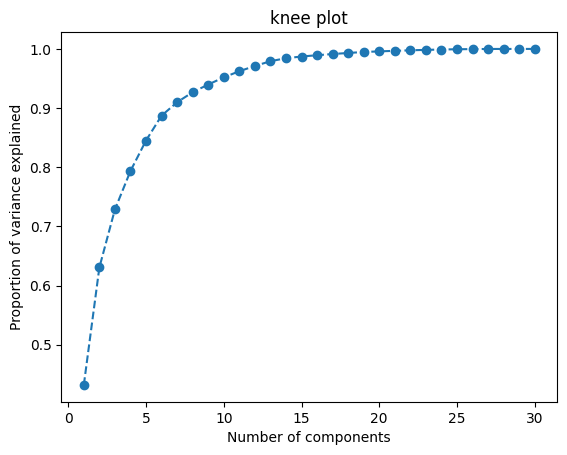

In [6]:
ax = plt.axes()

ax.plot(range(1, 31), proportion_explained, marker='o', linestyle='--') # Vi vill hitta där knäet börjar avvika. så någonstans mellan 5-10 typ.
ax.set(title="knee plot", xlabel="Number of components", ylabel="Proportion of variance explained")

[Text(0.5, 1.0, 'PCA transformed data'),
 Text(0.5, 0, 'First component (PC1)'),
 Text(0, 0.5, 'Second component (PC2)')]

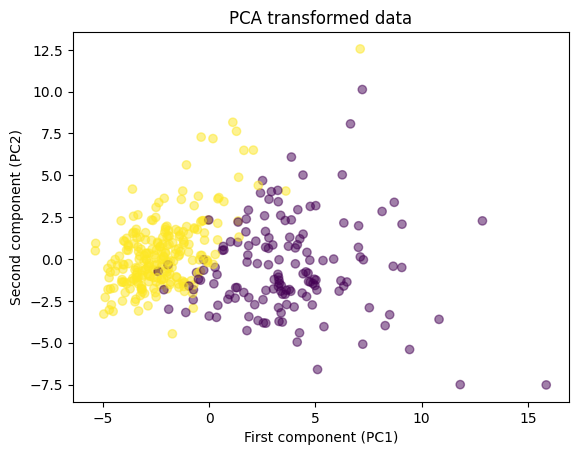

In [8]:
ax = plt.axes()
ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=y_train, alpha=0.5)
ax.set(title="PCA transformed data", xlabel="First component (PC1)", ylabel="Second component (PC2)") # Tänk på att båda variablerna här är en kombination av alla X i datan! Alltås namnlösa typ, (oövervakat?)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



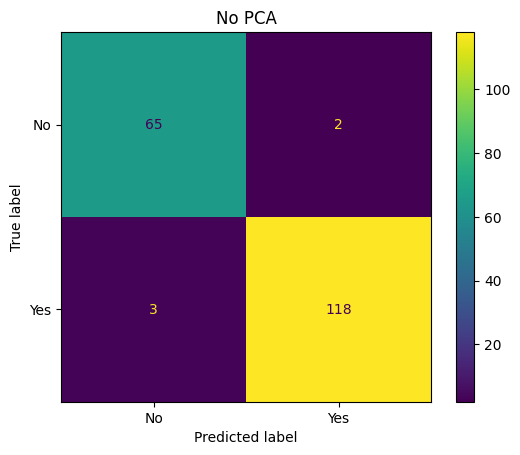

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

def evaluate_model(model, title = ""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes']).plot()
    plt.title(title)

pipe_PCA = Pipeline([('scaling', StandardScaler()), ('dim_red', PCA(10)), ('svm', SVC(kernel='linear'))])

pipe_no_PCA = Pipeline([('scaling', StandardScaler()), ('svm', SVC(kernel='linear'))])

evaluate_model(pipe_no_PCA, "No PCA")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



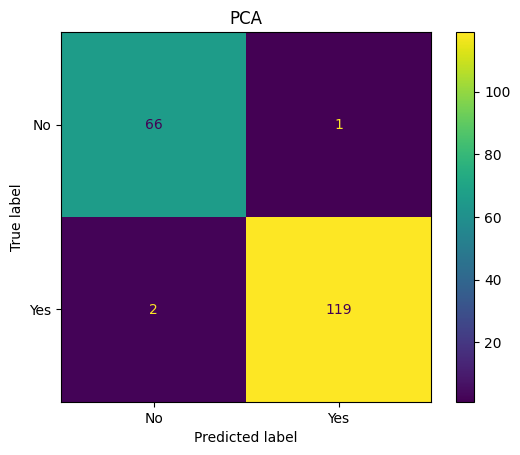

In [17]:
evaluate_model(pipe_PCA, "PCA")